### Import Libraries

In [87]:
import matplotlib.pyplot as plt  # Plotting Library
import numpy as np               # Numpy Library
import pandas as pd              # Dataframe Library
from sklearn.linear_model import LinearRegression, Lasso, Ridge # Linear Regression 
from sklearn.metrics import r2_score  # R2 Score
from scipy.stats.mstats import normaltest # Import normaltest
from sklearn.model_selection import KFold, cross_val_predict         # KFold, cross_val_predict
from sklearn.model_selection import train_test_split # Train Test Split
from scipy.stats import boxcox # Box Cox
from sklearn.preprocessing import PowerTransformer # Power Transform
from sklearn.pipeline import Pipeline   # Pipeine
from sklearn.preprocessing import StandardScaler, PolynomialFeatures # StandardScaler and PolynomialFeatures

### Data

In [2]:
df = pd.read_csv('AirfoilSelfNoise.csv') # Read CSV
df.head() # Peek

,f,alpha,c,U_infinity,delta,SSPL
0,800,0.0,0.3048,71.3,0.002663,126.201
1,1000,0.0,0.3048,71.3,0.002663,125.201
2,1250,0.0,0.3048,71.3,0.002663,125.951
3,1600,0.0,0.3048,71.3,0.002663,127.591
4,2000,0.0,0.3048,71.3,0.002663,127.461


#### Data Description

    Input features:

        f: Frequency in Hertzs [Hz].
        alpha: Angle of attack (AoA, α), in degrees [°].
        c: Chord length, in meters [m].
        U_infinity: Free-stream velocity, in meters per second [m/s].
        delta: Suction side displacement thickness (𝛿), in meters [m].

    Output:

        SSPL: Scaled sound pressure level, in decibels [dB]

### Data Exploration

    Determine Normality

    1. If the target variable is Normally distributed, it obtains better results.

    2. If our target is not normally distributed, we can apply a transformation to it and then fit 
       our regression to predict the transformed values.

    3. To see if target values are normally distributed, check:
        a. Visualy
        b. Statistically

#### Hypothesis

    Null Hypothesis: The target values are normally distributed.
    Alternate Hypothesis: The target values are not normally distributed.

#### Visual Test: Plot Histogram of target

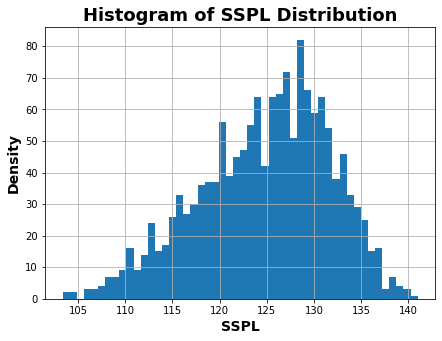

In [4]:
plt.figure(figsize=(7,5)) # Figure
plt.hist(df['SSPL'], bins = 50)  # Histogram
plt.grid(True) # Grid
plt.title('Histogram of SSPL Distribution', fontdict={'fontsize':18, 'fontweight':'semibold'}) # Title
plt.xlabel('SSPL', fontdict={'fontsize':14, 'fontweight':'semibold'}) # X-Label
plt.ylabel('Density', fontdict={'fontsize':14, 'fontweight':'semibold'}) # Y-Label
plt.show() # Show

##### The histogram is not normally distributed. We have to transform it.

#### Statistic Test: Check with p-value

In [6]:
normaltest(df['SSPL']) # Normal Test

NormaltestResult(statistic=49.45069509012877, pvalue=1.8277550732540224e-11)

    Note: Statisticians say if p > 0.05, then the dataset is normally distributed. Here, since p-value 
      is less than 0.05, it is not normally distributed, so we reject the Null Hypothesis.

#### Transformation

    1. Linear Regression assumes a normal distributed residuals. So, we have to transform the target 
       variables.
    2. Some transformation which can make a non-normally distributed to a normally distributed are:
       a. Log Transformation
       b. Square Root Transformation
       c. Box-Cox Transformation
       d. Inverse Transformation
       e. Yeo-Johnson Transformation

#### Transformation

In [69]:
log_y = np.log10(df['SSPL']) # Log Transformation
sqrt_y = np.sqrt(df['SSPL'])  # Square Root Transformation
box_y = boxcox(df['SSPL']) # Box Cox Transformation
inv_y = np.array(1/df['SSPL']) # Inverse Transformation

In [70]:
print('Log Transformation p-value:', normaltest(log_y))
print('*******************************************************')
print('SquareRoot Transformation p-val:', normaltest(sqrt_y))
print('*******************************************************')
print('Box Cox Transformation p-value:', normaltest(box_y[0]))
print('*******************************************************')
print('Inverse Transformation p-value:', normaltest(inv_y))

Log Transformation p-value: NormaltestResult(statistic=67.99079399949862, pvalue=1.721815737185587e-15)
*******************************************************
SquareRoot Transformation p-val: NormaltestResult(statistic=57.35720201056755, pvalue=3.5078566279140157e-13)
*******************************************************
Box Cox Transformation p-value: NormaltestResult(statistic=35.67116789274296, pvalue=1.7951647448346226e-08)
*******************************************************
Inverse Transformation p-value: NormaltestResult(statistic=97.97788318234974, pvalue=5.301185393463406e-22)


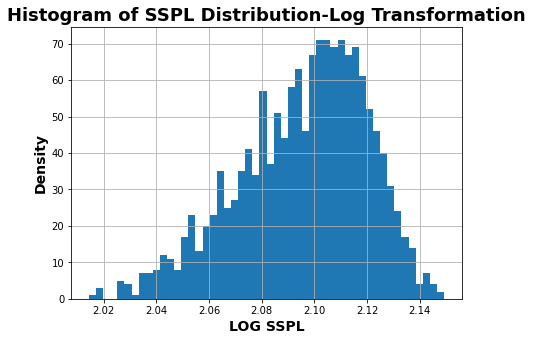

In [71]:
plt.figure(figsize=(7,5)) # Figure
plt.hist(log_y, bins = 50)  # Histogram
plt.grid(True) # Grid
plt.title('Histogram of SSPL Distribution-Log Transformation', fontdict={'fontsize':18, 'fontweight':'semibold'}) # Title
plt.xlabel('LOG SSPL', fontdict={'fontsize':14, 'fontweight':'semibold'}) # X-Label
plt.ylabel('Density', fontdict={'fontsize':14, 'fontweight':'semibold'}) # Y-Label
plt.show() # Show

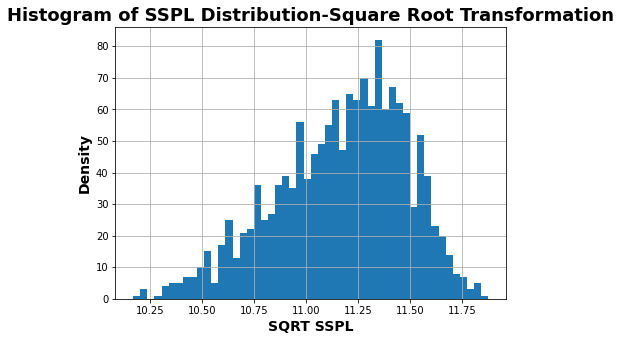

In [72]:
plt.figure(figsize=(7,5)) # Figure
plt.hist(sqrt_y, bins = 50)  # Histogram
plt.grid(True) # Grid
plt.title('Histogram of SSPL Distribution-Square Root Transformation', fontdict={'fontsize':18, 'fontweight':'semibold'}) # Title
plt.xlabel('SQRT SSPL', fontdict={'fontsize':14, 'fontweight':'semibold'}) # X-Label
plt.ylabel('Density', fontdict={'fontsize':14, 'fontweight':'semibold'}) # Y-Label
plt.show() # Show

#### Let us try Yeo-Johnson Transformation

In [73]:
scaler = StandardScaler() # Normalizer
yj_y = scaler.fit_transform(df[['SSPL']]) # Normalize

In [74]:
pt = PowerTransformer(method='yeo-johnson') # Yeo-Johnson Transfromation
yj_y = pt.fit_transform(dat) # Transform

In [75]:
normaltest(yj_y) # Chek P-vlaue

NormaltestResult(statistic=masked_array(data=[31.256482077076225],
             mask=[False],
       fill_value=1e+20), pvalue=array([1.63207892e-07]))

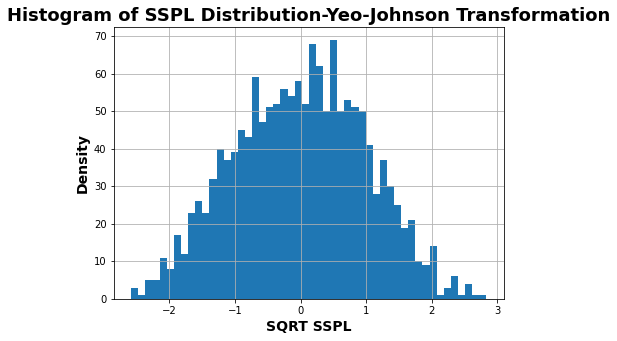

In [76]:
plt.figure(figsize=(7,5)) # Figure
plt.hist(yj_y, bins = 50)  # Histogram
plt.grid(True) # Grid
plt.title('Histogram of SSPL Distribution-Yeo-Johnson Transformation', fontdict={'fontsize':18, 'fontweight':'semibold'}) # Title
plt.xlabel('SQRT SSPL', fontdict={'fontsize':14, 'fontweight':'semibold'}) # X-Label
plt.ylabel('Density', fontdict={'fontsize':14, 'fontweight':'semibold'}) # Y-Label
plt.show() # Show

### Note:
    1. With the implementation all the transformation, the p-value is not increasing above 0.05. 
       The best transformation is the Yeo-Johnson Transformation with the least p-value.
        
    2. Since we did not get a p-value above 0.05, we do not transform the data.

### Features and Labels

In [82]:
x = df.drop(labels='SSPL', axis=1) # Features
y = df['SSPL'] # Labels

### Cross-Validation

In [81]:
kf = KFold(shuffle=True, random_state=72012, n_splits = 3)

### Model 1: Multiple Linear Regression with Cross Validation

In [83]:
scores = []
lr = LinearRegression() # linear Regression
s = StandardScaler() # Standard Scaler
for train_index, test_index in kf.split(x):
    x_train, x_test, y_train, y_test = (x.iloc[train_index, :], x.iloc[test_index, :], y[train_index], y[test_index]) # Test Train Split
    
    x_train = s.fit_transform(x_train) # Standardize Train set
    lr.fit(x_train, y_train) # Fit Model
    x_test = s.transform(x_test) # Standardize test set
    y_pred = lr.predict(x_test) # Predict
    score = r2_score(y_test.values, y_pred) # R2 Score
    scores.append(score) # Append List
    
print(scores) # See Scores

[0.4917699689574735, 0.47539556673158445, 0.5428883250702099]


### Model 2: Lasso Regression

In [96]:
alphas = np.geomspace(1e-9, 1e0, num=10) # Alphas
pf = PolynomialFeatures(degree=2) #  Polynomial Features
scores = [] # List
coef = [] # List
s = StandardScaler() # Standard Scaler
for alpha in alphas:
    las = Lasso(alpha=alpha, max_iter = 10000) # Lasso Regression
    estimator = Pipeline([('scaler', s),("polynomial_features", pf), ('lasso_regr', las)]) # Pipeline
    predictions = cross_val_predict(estimator, x, y, cv=kf)  # Cross Val Predict
    score = r2_score(y, predictions) # R2 Score
    scores.append(score) # Append
print(scores) # Print

[0.6170217154073374, 0.6170217163454399, 0.6170217257275548, 0.6170218195035495, 0.6170227563746231, 0.6170320097065503, 0.6171128919576407, 0.6175151445179615, 0.6170725876850602, 0.37601334457639823]


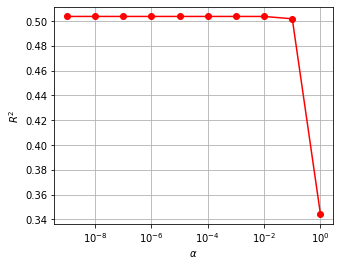

In [89]:
plt.figure(figsize=(5,4)) # Figure
plt.semilogx(alphas, scores, '-ro')  # Semilog Plot
plt.xlabel('$\\alpha$') # Xlabel
plt.ylabel('$R^2$') # Ylabel
plt.grid(True)
plt.show()

### Model 3: Ridge Regression with Polynomial Features

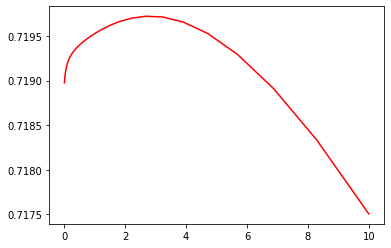

In [95]:
pf = PolynomialFeatures(degree=3) #  Polynomial Features
alphas = np.geomspace(0.001, 10, 50) # Alphas
scores=[]  # List
for alpha in alphas:
    ridge = Ridge(alpha=alpha, max_iter=100000) # Ridge Regression

    estimator = Pipeline([("scaler", s),("polynomial_features", pf),("ridge_regression", ridge)]) # Pipeline

    predictions = cross_val_predict(estimator, x, y, cv = kf) # Cross Val Predict
    score = r2_score(y, predictions) # R2 Score
    scores.append(score) # Append List

plt.plot(alphas, scores, 'red') # Plot